<a href="https://colab.research.google.com/github/sudhe-er/Stock-Price-Prediction-Using-LSTM-Streamlit_App/blob/main/LSTM_Model(Infosys).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
pip install --upgrade pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install --upgrade pandas-datareader


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
start = '2011-01-01'
end = '2021-12-31'
df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.049908
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.102356
2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.184994
2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.176763
2011-01-07,12.012500,11.853571,11.928214,12.004286,311931200.0,10.249638


In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,179.586868
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,178.551132
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,178.640778
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.465637
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,176.838226


# **Resetting The Index**

In [6]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.049908
1,2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.102356
2,2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.184994
3,2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.176763
4,2011-01-07,12.012500,11.853571,11.928214,12.004286,311931200.0,10.249638


# **Dropping The Date & Adj Close Colmns**

In [7]:
df = df.drop(['Date','Adj Close'],axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,11.795000,11.601429,11.630000,11.770357,445138400.0
1,11.875000,11.719643,11.872857,11.831786,309080800.0
2,11.940714,11.767857,11.769643,11.928571,255519600.0
3,11.973214,11.889286,11.954286,11.918929,300428800.0
4,12.012500,11.853571,11.928214,12.004286,311931200.0


# **Moving Avgs**

In [8]:
df

,High,Low,Open,Close,Volume
0,11.795000,11.601429,11.630000,11.770357,445138400.0
1,11.875000,11.719643,11.872857,11.831786,309080800.0
2,11.940714,11.767857,11.769643,11.928571,255519600.0
3,11.973214,11.889286,11.954286,11.918929,300428800.0
4,12.012500,11.853571,11.928214,12.004286,311931200.0
...,...,...,...,...,...
2764,180.419998,177.070007,177.089996,180.330002,74919600.0
2765,181.330002,178.529999,180.160004,179.289993,79144300.0
2766,180.630005,178.139999,179.330002,179.380005,62348900.0
2767,180.570007,178.089996,179.470001,178.199997,59773000.0


In [9]:
df.Close

0        11.770357
1        11.831786
2        11.928571
3        11.918929
4        12.004286
           ...    
2764    180.330002
2765    179.289993
2766    179.380005
2767    178.199997
2768    177.570007
Name: Close, Length: 2769, dtype: float64

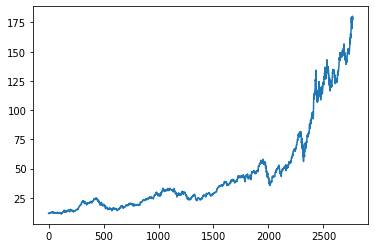

In [10]:
plt.plot(df.Close)

In [11]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2764    153.3444
2765    153.6667
2766    153.9991
2767    154.3202
2768    154.6399
Name: Close, Length: 2769, dtype: float64

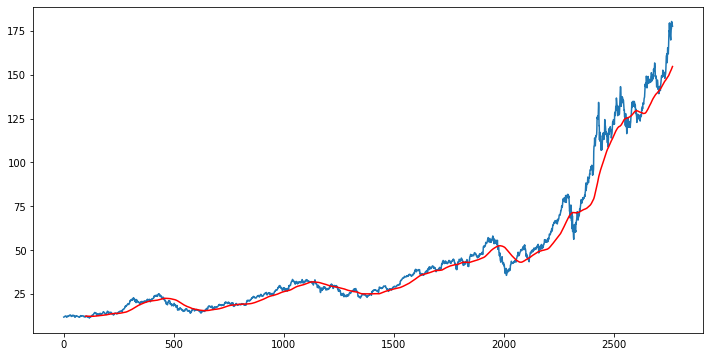

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [13]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2764    142.85570
2765    143.13220
2766    143.40125
2767    143.66845
2768    143.95365
Name: Close, Length: 2769, dtype: float64

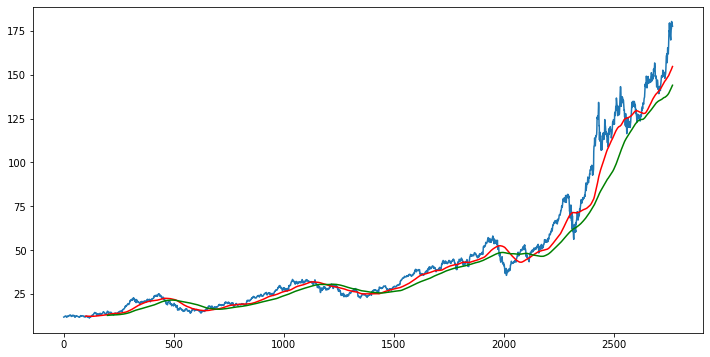

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200,'g')

In [15]:
df.shape

(2769, 5)

# **Splitting Dataset into Training & Testing**

In [16]:
data_training = pd.DataFrame(df['Close'][0:(int)(len(df)*0.70)])   # 70% data in training dataset 

data_testing = pd.DataFrame(df['Close'][(int)(len(df)*0.70):(int)(len(df))]) # 30% data in testing dataset

print(data_training.shape)
print(data_testing.shape)

(1938, 1)
(831, 1)


In [17]:
data_training.head()

,Close
0,11.770357
1,11.831786
2,11.928571
3,11.918929
4,12.004286


In [18]:
data_testing.head()

,Close
1938,55.959999
1939,54.470001
1940,54.560001
1941,54.592499
1942,55.007500


# **Scaling The Data To Fit Into LSTM Model**

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

# **Fitting Training data into an Array**

In [20]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01110504],
       [0.01244545],
       [0.01455734],
       ...,
       [0.97539747],
       [0.96023227],
       [0.98936255]])

# **Divide The dataSet into Training dataset**

In [21]:
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i - 100 : i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# **LSTM Model**

In [22]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [23]:
model = Sequential()
#Layer1
model.add(LSTM(units = 50, activation = 'relu', return_sequences= True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))
#Layer2
model.add(LSTM(units = 60, activation = 'relu', return_sequences= True))
model.add(Dropout(0.3))
#Layer3
model.add(LSTM(units = 80, activation = 'relu', return_sequences= True))
model.add(Dropout(0.4))
#Layer4
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

# Summary

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

# Compile

In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
58/58 [==============================] - 21s 279ms/step - loss: 0.0323
Epoch 2/50
58/58 [==============================] - 16s 274ms/step - loss: 0.0060
Epoch 3/50
58/58 [==============================] - 16s 284ms/step - loss: 0.0051
Epoch 4/50
58/58 [==============================] - 16s 278ms/step - loss: 0.0047
Epoch 5/50
58/58 [==============================] - 16s 273ms/step - loss: 0.0040
Epoch 6/50
58/58 [==============================] - 16s 273ms/step - loss: 0.0049
Epoch 7/50
58/58 [==============================] - 16s 271ms/step - loss: 0.0042
Epoch 8/50
58/58 [==============================] - 16s 274ms/step - loss: 0.0041
Epoch 9/50
58/58 [==============================] - 16s 275ms/step - loss: 0.0038
Epoch 10/50
58/58 [==============================] - 16s 270ms/step - loss: 0.0033
Epoch 11/50
58/58 [==============================] - 17s 290ms/step - loss: 0.0034
Epoch 12/50
58/58 [==============================] - 17s 287ms/step - loss: 0.0037
Epoch 13/50
5

# Save The Model

In [26]:
model.save('keras_model.h5')

# Testing The Data

In [ ]:
data_testing.head()

,Close
1938,55.959999
1939,54.470001
1940,54.560001
1941,54.592499
1942,55.007500


In [ ]:
data_training.tail(100)

,Close
1838,40.735001
1839,40.912498
1840,41.055000
1841,40.580002
1842,41.314999
...,...
1933,55.325001
1934,54.582500
1935,55.962502
1936,55.267502


In [ ]:
past100_days = data_training.tail(100)

In [ ]:
final_df = past100_days.append(data_testing, ignore_index=True)

In [ ]:
final_df.head()

,Close
0,40.735001
1,40.912498
2,41.055000
3,40.580002
4,41.314999


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.03582961],
       [0.03705557],
       [0.03803982],
       [0.03475904],
       [0.0398356 ],
       [0.04646626],
       [0.05936492],
       [0.05991746],
       [0.07190095],
       [0.0741975 ],
       [0.07573429],
       [0.0779963 ],
       [0.08262392],
       [0.08012017],
       [0.0793604 ],
       [0.07640771],
       [0.0794122 ],
       [0.07735742],
       [0.07618323],
       [0.07846252],
       [0.07765096],
       [0.07972303],
       [0.0793604 ],
       [0.08010291],
       [0.07892872],
       [0.07823804],
       [0.07715019],
       [0.08296929],
       [0.08571478],
       [0.08827033],
       [0.08942723],
       [0.08852935],
       [0.08549029],
       [0.08467873],
       [0.0864918 ],
       [0.08376357],
       [0.08393625],
       [0.08055185],
       [0.08037919],
       [0.07511267],
       [0.07651131],
       [0.07471553],
       [0.07378308],
       [0.06903458],
       [0.07293697],
       [0.07247078],
       [0.07478459],
       [0.074

In [ ]:
input_data.shape

(931, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i - 100 : i])
  y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(831, 100, 1)
(831,)


# Make Predictions

In [ ]:
y_predicted = model.predict(x_test)

In [ ]:
y_predicted.shape

(831, 1)

In [ ]:
y_test

array([0.14098733, 0.13069605, 0.13131767, 0.13154213, 0.1344085 ,
       0.13031616, 0.13572081, 0.13813824, 0.13508192, 0.142904  ,
       0.14426813, 0.14689274, 0.15038074, 0.15519832, 0.14815327,
       0.14176435, 0.14086647, 0.14621932, 0.12807141, 0.12477336,
       0.1380001 , 0.12979814, 0.13806916, 0.13641151, 0.12748433,
       0.13316526, 0.13547906, 0.13907066, 0.12587846, 0.13401136,
       0.12796781, 0.1209573 , 0.12278763, 0.13238823, 0.13819004,
       0.11273806, 0.10256763, 0.10633191, 0.11700308, 0.11448207,
       0.10754062, 0.08975531, 0.08640546, 0.07702934, 0.08498955,
       0.08865021, 0.07540621, 0.06007286, 0.05972752, 0.0519745 ,
       0.05599778, 0.05534164, 0.06691071, 0.06451056, 0.06283563,
       0.07361042, 0.05957212, 0.05617046, 0.04541295, 0.04732962,
       0.04565469, 0.04646626, 0.04966069, 0.04021548, 0.03755633,
       0.04123427, 0.03228981, 0.0252793 , 0.01474625, 0.00801202,
       0.02586638, 0.02410511, 0.02424325, 0.02685063, 0.02716

In [ ]:
scaler.scale_

array([0.00690691])

In [ ]:
scale_factor = 1/0.00690691
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor


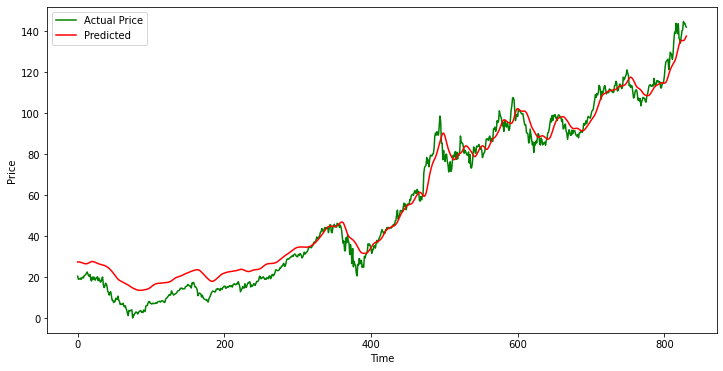

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(y_test, 'g', label = 'Actual Price')
plt.plot(y_predicted, 'r', label = 'Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()